In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = r"C:\Users\aliab\OneDrive - Bahrain Institute of Banking and Finance (BIBF)\Jupyter_Projects_Cloud\Datasets\lending_club_loan_data.csv"
df = pd.read_csv(url, low_memory=False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [5]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [6]:
def preprocessing(df):
    missing_values = df.isnull().sum()
    print(f'\nThe dataset contains {missing_values} null values')
    print(f'\nThe dataset contains {df.shape}')
    duplicated = df.duplicated().sum()
    print(f'\nThe dataset contains {duplicated} duplicated values ')

In [7]:
print(preprocessing(df))


The dataset contains id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64 null values

The dataset contains (2260701, 151)

The dataset contains 0 duplicated values 
None


# Data Cleaning:

### Lets drop features that only exist in the future and irrelevant variables:

In [8]:
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'policy_code',
    'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv',
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
    'last_fico_range_high', 'last_fico_range_low',
    'fico_range_high', 'payment_plan_start_date', 'orig_projected_additional_accrued_interest',
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
    'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date',
    'hardship_length', 'hardship_dpd', 'hardship_loan_status',
    'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
    'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status',
    'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term']

In [9]:
print(f"The Dataframe has {df.shape} rows and columns before dropping")
df = df.drop(columns=columns_to_drop)
print(f"The Dataframe contains {df.shape} rows and columns after dropping")

The Dataframe has (2260701, 151) rows and columns before dropping
The Dataframe contains (2260701, 104) rows and columns after dropping


### lets exclude (filter out) some of the statuses that are in the future or uncertain

In [10]:
status_to_exclude = ['Current', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']

print(f'Number of rows before exclusion is {df.shape[0]}')

# filter out
df_cleaned = df[~df['loan_status'].isin(status_to_exclude)].copy()
# .copy() is is used to prevent the "SettingWithCopyWarning"

print(f'Number of rows after exclusion is {df_cleaned.shape[0]}')

Number of rows before exclusion is 2260701
Number of rows after exclusion is 1371960


In [11]:
# Defining the statuses for defaulting
default_status = ['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off', 'Default']

# Assigning value equal 1 if defaulted and 0 if not
df_cleaned['is_default'] = df_cleaned['loan_status'].apply(lambda x: 1 if x in default_status else 0)

print(df_cleaned.groupby('loan_status')['is_default'].value_counts())

loan_status                                          is_default
Charged Off                                          1              268559
Default                                              1                  40
Does not meet the credit policy. Status:Charged Off  1                 761
Fully Paid                                           0             1076751
Late (16-30 days)                                    1                4349
Late (31-120 days)                                   1               21467
Name: count, dtype: int64


In [12]:
# Determine the number and percentage of loan status types 
loan_types = df_cleaned['is_default'].value_counts()
print(loan_types)
print("\nPercentage Scores:")
print(loan_types/1371960*100) # 1371960 refers to the number of entries/rows

is_default
0    1076784
1     295176
Name: count, dtype: int64

Percentage Scores:
is_default
0    78.485087
1    21.514913
Name: count, dtype: float64


In [13]:
df_cleaned = df_cleaned.drop(columns=['loan_status'])
df_cleaned.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,is_default
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
5,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0


# Feature Engineering:

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_cleaned.dtypes)

loan_amnt                              float64
term                                    object
int_rate                               float64
installment                            float64
grade                                   object
sub_grade                               object
emp_title                               object
emp_length                              object
home_ownership                          object
annual_inc                             float64
verification_status                     object
issue_d                                 object
pymnt_plan                              object
purpose                                 object
addr_state                              object
dti                                    float64
delinq_2yrs                            float64
earliest_cr_line                        object
fico_range_low                         float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
mths_since_la

### Handling emp_length column:

In [15]:
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.replace('years', '', regex=False)
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.replace('+', '', regex=False)
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.replace('year', '', regex=False)
df_cleaned['emp_length'] = df_cleaned['emp_length'].str.replace('< 1', '1', regex=False)

In [16]:
df_cleaned['emp_length'] = pd.to_numeric(df_cleaned['emp_length'], errors='coerce')

emp_length_median = df_cleaned['emp_length'].median()
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(emp_length_median).astype(int)

df_cleaned['emp_length']

0          10
1          10
2          10
4           3
5           4
           ..
2260691     3
2260692    10
2260697     6
2260699     6
2260700     6
Name: emp_length, Length: 1371960, dtype: int64

In [17]:
df_cleaned['emp_length'].isnull().sum()

np.int64(0)

### Handling Dates:

In [18]:
df_cleaned['issue_d'] = pd.to_datetime(df_cleaned['issue_d'], format='%b-%Y')
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], format='%b-%Y')

In [19]:
from datetime import datetime

# We will use the most recent issue date in the dataset as a reference point for simplicity.
reference_date = df_cleaned['issue_d'].max() 

# Function to calculate months difference
def months_difference(date_start, date_end):
    if pd.isna(date_start) or pd.isna(date_end):
        return np.nan
    return 12 * (date_end.year - date_start.year) + (date_end.month - date_start.month)

# Feature 1: Months Since Earliest Credit Line (Credit History Length)
# The reference date is used to represent 'now' relative to the earliest credit line date.
df_cleaned['mths_since_earliest_cr_line'] = df_cleaned.apply(
    lambda row: months_difference(row['earliest_cr_line'], reference_date), axis=1
)

# Feature 2: Loan Age (Months Since Issue) - can be used to capture time effects
df_cleaned['mths_since_issue'] = df_cleaned.apply(
    lambda row: months_difference(row['issue_d'], reference_date), axis=1
)

# Drop the original date columns
df_cleaned = df_cleaned.drop(columns=['issue_d', 'earliest_cr_line'])

print("Date columns converted to numerical 'Months Since' features.")

Date columns converted to numerical 'Months Since' features.


### Financial Ratios:

In [20]:
df_cleaned['term_months'] = df_cleaned['term'].str.extract('(\d+)').astype(float)
df_cleaned = df_cleaned.drop(columns=['term'])

In [21]:
df_cleaned['monthly_income'] = df_cleaned['annual_inc']/12
df_cleaned['DSR'] = np.where(df_cleaned['monthly_income'] > 0, df_cleaned['installment'] / df_cleaned['monthly_income'], np.nan)

df_cleaned = df_cleaned.drop(columns=['monthly_income'])
print('Creation of DSR Ratio is done')

Creation of DSR Ratio is done


### Dropping columns with many missing values:

In [22]:
nan_counts = df_cleaned.isnull().sum()
total_rows = len(df_cleaned)
nan_percentage = (nan_counts/total_rows)*100
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nan_percentage)

loan_amnt                               0.002405
int_rate                                0.002405
installment                             0.002405
grade                                   0.002405
sub_grade                               0.002405
emp_title                               6.443118
emp_length                              0.000000
home_ownership                          0.002405
annual_inc                              0.002405
verification_status                     0.002405
pymnt_plan                              0.002405
purpose                                 0.002405
addr_state                              0.002405
dti                                     0.031779
delinq_2yrs                             0.002624
fico_range_low                          0.002405
inq_last_6mths                          0.002697
mths_since_last_delinq                 50.380113
mths_since_last_record                 82.971661
open_acc                                0.002624
pub_rec             

In [23]:
# Choosing columns with > 50% missing values to drop
columns_to_drop_nan = ['revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
                  'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 
                  'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
                  'mths_since_recent_bc_dlq', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
                  'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                 'mths_since_last_major_derog', 'mths_since_last_record']
df_cleaned = df_cleaned.drop(columns=columns_to_drop_nan)

In [24]:
# Imputing numerical columns with nans to medians
numerical_columns_with_nans = df_cleaned.select_dtypes(include=['float64', 'int']).columns[df_cleaned.select_dtypes(include=['float64', 'int']).isnull().any()].tolist()

for col in numerical_columns_with_nans:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val)

print("Remaining NaNs in numerical columns imputed using the median.")

Remaining NaNs in numerical columns imputed using the median.


### Lets check the missing values again to see the changes

In [25]:
nan_counts = df_cleaned.isnull().sum()
total_rows = len(df_cleaned)
nan_percentage = (nan_counts/total_rows)*100
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nan_percentage)

loan_amnt                      0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.002405
sub_grade                      0.002405
emp_title                      6.443118
emp_length                     0.000000
home_ownership                 0.002405
annual_inc                     0.000000
verification_status            0.002405
pymnt_plan                     0.002405
purpose                        0.002405
addr_state                     0.002405
dti                            0.000000
delinq_2yrs                    0.000000
fico_range_low                 0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq         0.000000
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
revol_util                     0.000000
total_acc                      0.000000
initial_list_status            0.002405
collections_12_mths_ex_med     0.000000


### Lets do ordinal encoding for grade and sub grade: 

In [26]:
df_cleaned['sub_grade'].value_counts()

sub_grade
C1    87166
B4    84556
B5    84164
B3    82887
C2    80885
C3    76774
C4    76453
B2    74970
B1    72037
C5    69594
A5    64516
A4    52665
D1    52661
D2    46067
A1    43866
D3    40589
A3    38297
A2    37422
D4    36641
D5    30935
E1    24303
E2    21895
E3    18979
E4    16198
E5    15007
F1    10227
F2     7361
F3     6252
F4     4997
F5     4084
G1     3104
G2     2188
G3     1665
G4     1345
G5     1177
Name: count, dtype: int64

In [27]:
sub_grade_ranking = [
    'A1', 'A2', 'A3', 'A4', 'A5', 
    'B1', 'B2', 'B3', 'B4', 'B5', 
    'C1', 'C2', 'C3', 'C4', 'C5', 
    'D1', 'D2', 'D3', 'D4', 'D5', 
    'E1', 'E2', 'E3', 'E4', 'E5', 
    'F1', 'F2', 'F3', 'F4', 'F5', 
    'G1', 'G2', 'G3', 'G4', 'G5'
]

# Creating a mapping dictionary
sub_grade_map = {grade: 35 - i for i, grade in enumerate(sub_grade_ranking)}

# Applying the mapping to sub_grade_ranking
df_cleaned['sub_grade_rank'] = df_cleaned['sub_grade'].map(sub_grade_map)

In [28]:
# Check for missing values
df_cleaned['sub_grade_rank'].isnull().sum()

np.int64(33)

In [29]:
# Replace missing values with median
sub_grade_median = df_cleaned['sub_grade_rank'].median()

df_cleaned['sub_grade_rank'] = df_cleaned['sub_grade_rank'].fillna(sub_grade_median)

df_cleaned['sub_grade_rank'].isnull().sum()

np.int64(0)

In [30]:
# Dropping the original sub grade column and grade since sub grade does the job there is no need for grade
df_cleaned = df_cleaned.drop(columns=['grade', 'sub_grade'])
print("Ordinal grade features converted to numerical.")

Ordinal grade features converted to numerical.


### Lets do OneHotEncoding for nominal features:

In [31]:
# Dropping emp_title first since there is no rank and any meaning in a numerical form 
df_cleaned = df_cleaned.drop(columns=['emp_title'])

categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print("Remaining categorical features One-Hot Encoded.")
print(f"New total number of features: {df_cleaned.shape[1]}")

Remaining categorical features One-Hot Encoded.
New total number of features: 135


### Note: I will not remove addr_state since I will be using XGBoost Model where it can handle a large number of features not like your typical Linear Regression Model.

### Lets check the features to ensure that there is no multicollinearity:

In [32]:
df_cleaned.corr()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,...,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay
loan_amnt,1.000000,0.142622,0.952993,0.087391,0.309887,0.031807,-0.002191,0.101289,-0.016403,-0.017037,...,0.001425,0.017437,-0.005869,0.005650,-0.008334,-0.002304,0.003100,0.068061,0.076688,0.006684
int_rate,0.142622,1.000000,0.155790,-0.005103,-0.071473,0.146181,0.047957,-0.403081,0.211379,-0.012631,...,0.001160,0.000699,-0.003144,0.001992,-0.005949,-0.001074,0.000266,-0.116678,0.045002,0.002692
installment,0.952993,0.155790,1.000000,0.075227,0.300725,0.035631,0.007088,0.051125,0.005616,-0.020406,...,-0.000737,0.014754,-0.005878,0.006432,-0.009681,-0.005122,0.002518,0.022369,0.071092,0.005486
emp_length,0.087391,-0.005103,0.075227,1.000000,0.065318,0.022008,0.021141,0.018415,-0.001304,0.001952,...,-0.003859,0.000185,0.004339,-0.003906,0.007171,0.006212,0.000714,0.015010,-0.033666,-0.006183
annual_inc,0.309887,-0.071473,0.300725,0.065318,1.000000,-0.139155,0.040959,0.069763,0.032421,-0.025109,...,-0.003201,0.015084,-0.007010,-0.000734,-0.014487,-0.007643,-0.002040,0.041271,-0.038810,-0.003267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
addr_state_WV,-0.002304,-0.001074,-0.005122,0.006212,-0.007643,0.008606,0.000329,0.004136,-0.000788,-0.001905,...,-0.005193,-0.010242,-0.002666,-0.008923,-0.006948,1.000000,-0.002793,-0.006135,-0.004557,0.001927
addr_state_WY,0.003100,0.000266,0.002518,0.000714,-0.002040,0.008414,-0.000484,0.002957,-0.002223,0.000564,...,-0.004024,-0.007936,-0.002065,-0.006914,-0.005384,-0.002793,1.000000,-0.002105,0.003245,-0.000719
initial_list_status_w,0.068061,-0.116678,0.022369,0.015010,0.041271,0.020219,0.008847,0.051942,-0.076567,0.002552,...,0.001247,-0.003256,-0.000009,-0.002016,0.003473,-0.006135,-0.002105,1.000000,0.064355,0.030010
application_type_Joint App,0.076688,0.045002,0.071092,-0.033666,-0.038810,0.175774,-0.003858,0.037518,-0.026967,0.000818,...,0.007647,-0.003133,0.000225,0.004931,0.008260,-0.004557,0.003245,0.064355,1.000000,0.005467


# Model Building

In [33]:
!pip install xgboost

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np

In [35]:
X = df_cleaned.drop(columns=['is_default'])
y = df_cleaned['is_default']

print(X.shape)
print(y.shape)

(1371960, 134)
(1371960,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) 

rs = RobustScaler()
X_train_scaled = rs.fit_transform(X_train)
X_test_scaled = rs.transform(X_test)

In [37]:
# Initialize SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Resample X_train_scaled and y_train
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

# Check the ratio of 
counter = Counter(y_resampled)
counter

Counter({1: 861427, 0: 861427})

In [38]:
# Check original shape of y_train
print(Counter(y_train))

Counter({0: 861427, 1: 236141})


### We can now use XGBoost Model for our X and y:

In [39]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                         n_estimators=100,
                         learning_rate=0.1,
                         use_label_encoder=False,
                         eval_metric='logloss',
                         random_state=42,
                         tree_method='hist') # Uses less memory for large datasets

xgb_model.fit(X_resampled, y_resampled)
print("XGBoost Model initialized and finished training")

C:\Users\aliab\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:54:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model initialized and finished training


# Evaluation

In [40]:
# Predicting probabilities on the original, scaled test set
y_scores = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC (Area Under the ROC Curve)
auc_score = roc_auc_score(y_test, y_scores)
print(f"\nArea Under the ROC Curve (AUC): {auc_score:.4f}")

# Checking the accuracy for the default threshold 0.5
yhat = xgb_model.predict(X_test_scaled)
print("\nClassification Report (Default 0.5 Threshold):")
print(classification_report(y_test, yhat, zero_division=0))


Area Under the ROC Curve (AUC): 0.7283

Classification Report (Default 0.5 Threshold):
              precision    recall  f1-score   support

           0       0.81      0.96      0.88    215357
           1       0.55      0.17      0.25     59035

    accuracy                           0.79    274392
   macro avg       0.68      0.56      0.57    274392
weighted avg       0.75      0.79      0.74    274392



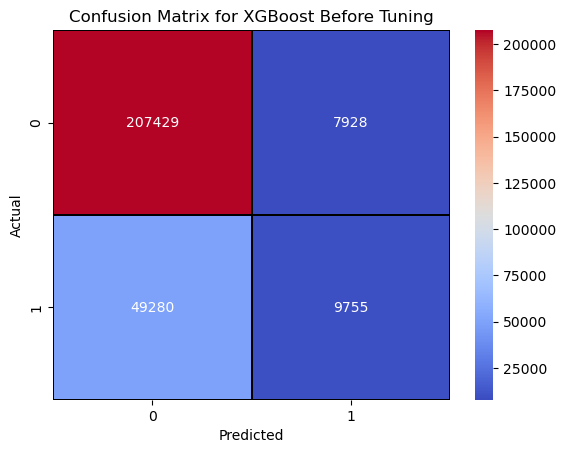

In [41]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

conf_mat = confusion_matrix(y_test, yhat)

sns.heatmap(conf_mat, annot=True, cmap='coolwarm', linecolor='black', linewidths=0.1, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Before Tuning')
plt.show()

Threshold that maximizes F1-score: 0.2580


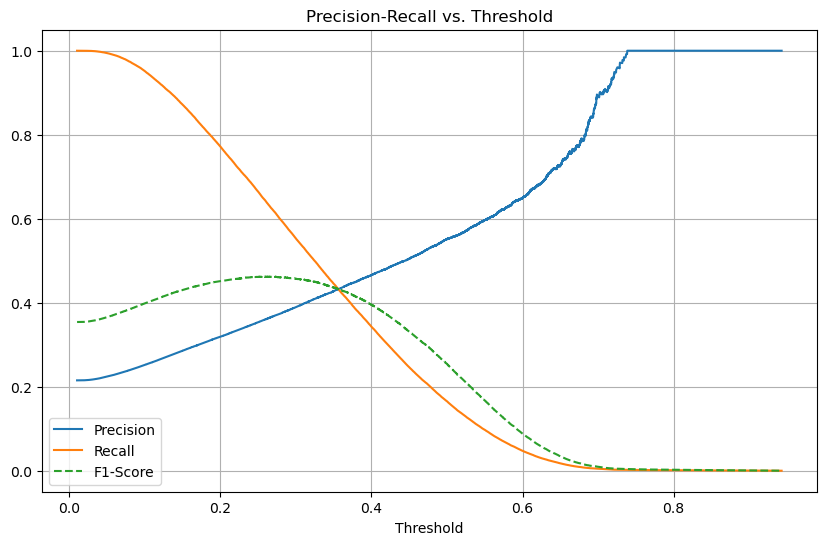

In [42]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1-score (a good starting point)
# Note: You may adjust this based on financial goals.
optimal_idx = np.nanargmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Threshold that maximizes F1-score: {optimal_threshold:.4f}")

# Plot the Precision-Recall Curve to visualize the trade-off
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', linestyle='--')
plt.xlabel('Threshold')
plt.title('Precision-Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
optimal_threshold = 0.2580

# If the probability score >= optimal_threshold, the prediction is 1 (Default), otherwise 0 (Not Default).
y_pred_final = (y_scores >= optimal_threshold).astype(int)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_final, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77    215357
           1       0.36      0.65      0.46     59035

    accuracy                           0.68    274392
   macro avg       0.62      0.67      0.62    274392
weighted avg       0.76      0.68      0.70    274392



### I will try to increase the prediction power of the model by performing hyperparameter tuning using RandomizedSearchCV:

In [50]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.7 MB/s eta 0:00:00


In [51]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from scipy.stats import uniform, randint

# 1. Define the LightGBM Model
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42,
    n_jobs=-1,
    boosting_type='gbdt'
)

In [52]:
param_dist = {
    'n_estimators': randint(100, 500),         # Number of trees
    'learning_rate': uniform(0.01, 0.2),      # Step size
    'max_depth': randint(3, 7),               # Max depth of a tree (complexity)
    'num_leaves': randint(20, 40),            # LightGBM specific: Max leaves in one tree (complexity)
    'reg_alpha': uniform(0, 0.1)              # L1 regularization
}

In [54]:
rand_search = RandomizedSearchCV(
    estimator=lgb_model, 
    param_distributions=param_dist, 
    n_iter=15, 
    scoring='roc_auc', 
    cv=2, 
    verbose=1, 
    random_state=42,
    n_jobs=-1 
)

In [56]:
# Let's try 30% since 20% might have been too small to run overnight.
tuning_fraction = 0.30 

# Sample the resampled data (Critical to use stratify=y_resampled to keep the 50/50 balance)
X_tuning, _, y_tuning, _ = train_test_split(
    X_resampled, 
    y_resampled, 
    test_size=(1 - tuning_fraction), 
    random_state=42, 
    stratify=y_resampled # Ensures 50/50 balance is preserved in X_tuning/y_tuning
)

print(f"Reduced tuning set size: {X_tuning.shape[0]} rows")

Reduced tuning set size: 516856 rows


In [57]:
rand_search.fit(X_tuning, y_tuning)

print(f"Best LightGBM parameters found: {rand_search.best_params_}")
print(f"Best cross-validation AUC score: {rand_search.best_score_:.4f}")

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 258428, number of negative: 258428
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30785
[LightGBM] [Info] Number of data points in the train set: 516856, number of used features: 132
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [59]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# 1. Define the best parameters found by the search
best_params = {
    'learning_rate': 0.12848, 
    'max_depth': 5, 
    'n_estimators': 406, 
    'num_leaves': 26, 
    'reg_alpha': 0.01705,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'n_jobs': -1,
    'boosting_type': 'gbdt'
}

In [60]:
final_lgbm_model = lgb.LGBMClassifier(**best_params)

In [61]:
final_lgbm_model.fit(X_resampled, y_resampled)
print("Final LightGBM model trained successfully on the full resampled data.")

[LightGBM] [Info] Number of positive: 861427, number of negative: 861427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.236982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30736
[LightGBM] [Info] Number of data points in the train set: 1722854, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [66]:
# 1. Predict probabilities on the scaled, original test set
y_scores_final = final_lgbm_model.predict_proba(X_test_scaled)[:, 1]

# 2. Calculate the Final AUC (The true score)
final_auc = roc_auc_score(y_test, y_scores_final)
print(f"\nFinal Model AUC on Test Set: {final_auc:.4f}")

C:\Users\aliab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Final Model AUC on Test Set: 0.7413


Threshold that maximizes F1-score: 0.2391


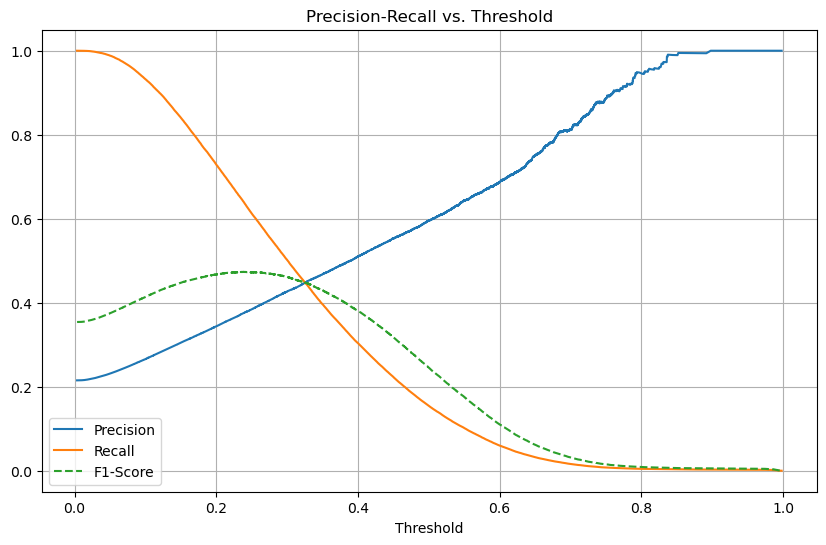

In [65]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_final)

# Calculate the F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1-score (a good starting point)
# Note: You may adjust this based on financial goals.
optimal_idx = np.nanargmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Threshold that maximizes F1-score: {optimal_threshold:.4f}")

# Plot the Precision-Recall Curve to visualize the trade-off
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', linestyle='--')
plt.xlabel('Threshold')
plt.title('Precision-Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# We use the new threshold
optimal_threshold = 0.2391 
y_pred_final = (y_scores_final >= optimal_threshold).astype(int)

print(f"\nClassification Report (Optimized Threshold: {optimal_threshold}):")
print(classification_report(y_test, y_pred_final, zero_division=0))


Classification Report (Optimized Threshold: 0.2391):
              precision    recall  f1-score   support

           0       0.88      0.71      0.78    215357
           1       0.38      0.64      0.47     59035

    accuracy                           0.69    274392
   macro avg       0.63      0.67      0.63    274392
weighted avg       0.77      0.69      0.72    274392



In [68]:
df_cleaned.to_csv('Loan_Cleaned_Dataset.csv')